In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev
import pandas as pd
from scipy.interpolate import splprep, splev, interp1d
from matplotlib.ticker import MultipleLocator
# Sample data for spline (x, y coordinates)
col=    [    (42/256, 157/256, 143/256),
        (183/256, 34/256, 48/256),
        (220/256, 109/256, 87/256),
    (16/256, 70/256, 128/256),
    #(49/256, 124/256, 183/256),
    (109/256, 173/256, 209/256),
    #(182/256, 215/256, 232/256),
    (246/256, 178/256, 147/256),]

col=[(138/256, 201/256, 38/256),
    "#C1121F","#003049"]

scaling_dict = {
    'Strain@B1_1.RN_6': 0.339*2,
    'Strain@B2_1.RN_6': 0.3505,
    'Strain@B2_2.RN_6': 0.5762,
    'Strain@B2_3.RN_6': -0.5072,
    'Strain@B2_4.RN_6': 0.0763,
    'Strain@B3_1.RN_6': 0.8693,
    'Strain@B3_2.RN_6': 0.8576,
    'Strain@B3_3.RN_6': -0.2255,
    'Strain@B3_4.RN_6': 0.2455,
    # Add other columns and their scaling factors here
}

def cut_data1(df1, start_time1, end_time1, selected_columns1, data_amount):
    filtered_df1 = df1.loc[(df1['t '] >= start_time1) & (df1['t '] <= end_time1)]
    filtered_df1['t ']=df1['t ']-start_time1
    return filtered_df1, selected_columns1

def cut_data2(df2, start_time2, end_time2, selected_columns2, data_amount):
    filtered_df2 = df2.loc[(df2['Time'] >= start_time2) & (df2['Time'] <= end_time2)]
    #selected_columns2 = selected_columns2[:data_amount]
    return filtered_df2, selected_columns2

def apply_scaling(filtered_df1, selected_columns1):
    for column in selected_columns1:
        scale = scaling_dict.get(column, 1)
        # print(filtered_df1.loc[:, column])
        filtered_df1.loc[:, column] = filtered_df1.loc[:, column] / scale
        print(scale)
    return filtered_df1

EXPR = r"C:\OneDrive\Articles\10.Working\[D21][20211009]ContactMechanics\MBD.jl\plots\adams2\MR_door (run 29)_out2.csv"
start_time1 = 98.4
end_time1 = 98.4+1.51
EXPR_MF_FX = pd.read_csv(EXPR)
selected_columns = ['Strain@B2_2.RN_6','Strain@B2_1.RN_6']
EXPR_MF_FX, selected_columns=cut_data1(EXPR_MF_FX, start_time1, end_time1, selected_columns, 2)
EXPR_MF_FX=apply_scaling(EXPR_MF_FX,selected_columns)

fn = r"C:\OneDrive\Articles\10.Working\[D21][20211009]ContactMechanics\MBD.jl\plots\adams2\ic3_exprcontace\MARKER_LF_SPL X_export.csv"
MFX = pd.read_csv(fn)
selected_columns = ['MFX']  # Replace with actual column names
SIM_MFX, selected_columns=cut_data2(MFX, 0, 2, selected_columns, 1)

fn = r"C:\OneDrive\Articles\10.Working\[D21][20211009]ContactMechanics\MBD.jl\plots\adams2\ic3_exprcontace\GFO_MF U3_export.csv"
MFFX = pd.read_csv(fn)
selected_columns = ['clea3_07-29-2024_1.asc']  # Replace with actual column names
SIM_MFFX, selected_columns=cut_data2(MFFX, 0, 2, selected_columns, 1)

fn="C:/OneDrive/Articles/10.Working/[D21][20211009]ContactMechanics/MBD.jl/plots/adams2/expr_contact/GUIDE_L.csv"
M = pd.read_csv(fn)
x=M["X"]
y=M["Y"]
tck, u = splprep([x, y], s=0)

new_x = SIM_MFX['clea3_07-29-2024_1.asc']
interp_func_x = interp1d(splev(u, tck)[0], u, bounds_error=False, fill_value="extrapolate")
new_u = interp_func_x(new_x)
new_y = splev(new_u, tck)[1]


0.5762
0.3505


C:\Users\lovca\AppData\Local\Temp\ipykernel_5392\3633788321.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['t ']=df1['t ']-start_time1


In [2]:
x2=EXPR_MF_FX["t "]
y2=EXPR_MF_FX["Strain@B2_2.RN_6"]
tck2, u2 = splprep([x2, y2], s=0)

new_x2 = SIM_MFX["Time"]
interp_func_x2 = interp1d(splev(u2, tck2)[0], u2, bounds_error=False, fill_value="extrapolate")
new_u2 = interp_func_x2(new_x2)
new_expr_fx = splev(new_u2, tck2)[1]

x3=EXPR_MF_FX["t "]
y3=EXPR_MF_FX["Strain@B2_1.RN_6"]
tck3, u3 = splprep([x3, y3], s=0)

new_x3 = SIM_MFX["Time"]
interp_func_x3 = interp1d(splev(u3, tck3)[0], u3, bounds_error=False, fill_value="extrapolate")
new_u3 = interp_func_x3(new_x3)
new_expr_fx3 = splev(new_u3, tck3)[1]

# plt.plot(x2,y2)
# #plt.plot(new_x2,new_expr_fx)
# plt.show()

In [3]:
new_u2,new_expr_fx3

(array([-3.00642368e-05,  4.44227321e-05,  1.22456701e-04, ...,
         9.87207515e-01,  9.90563172e-01,  9.94727538e-01]),
 array([-7.48689719, -7.80884835, -7.91045171, ..., -0.24635717,
        -2.57127147, -5.19966693]))

In [4]:
#spline_x, spline_y = splev(u, tck)

# Calculate the derivatives of the spline
dx, dy = splev(new_u, tck, der=1)

# Calculate the normal vectors
norm = np.sqrt(dx**2 + dy**2)
normal_x = -dy / norm
normal_y = dx / norm

In [5]:
interp_function = np.interp(SIM_MFX['Time'], EXPR_MF_FX['t '], EXPR_MF_FX['Strain@B3_2.RN_6'])
df2_new = pd.DataFrame({'ttt': SIM_MFX['Time'], 'MFX': interp_function})

# force_values = df2_new['MFX']
# force_values=SIM_MFFX['clea3_07-29-2024_1.asc']
force_values=new_expr_fx
force_scale = 1  # Adjust this value to scale the force vectors appropriately
vector_x = normal_x * force_values * force_scale
vector_y = normal_y * force_values * force_scale

force_values3=new_expr_fx3
vector_x3 = normal_x * force_values3 * force_scale
vector_y3 = normal_y * force_values3 * force_scale


# Interval for drawing the vectors
interval = 20  # Adjust the interval as needed

# Lists to store the tip coordinates of the vectors


In [6]:
# plt.plot(SIM_MFFX['Time'], new_expr_fx)
# plt.show()
# plt.plot(SIM_MFFX['Time'], SIM_MFFX['clea3_07-29-2024_1.asc'])
# plt.show()
# plt.plot(EXPR_MF_FX["t "], EXPR_MF_FX["Strain@B3_2.RN_6"])
# plt.show()

In [7]:
    textstyle = {'family': 'Times New Roman', 'size': 16}
    tick_fontsize = 20
    tick_font = 'Times New Roman'

C:\Users\lovca\AppData\Local\Temp\ipykernel_5392\3907395774.py:62: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


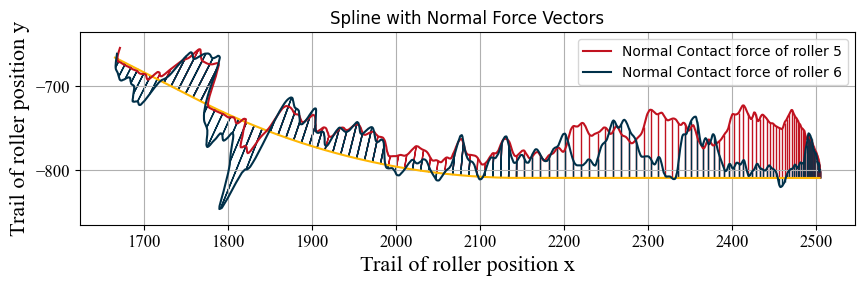

In [14]:
# Plot the spline
tip_x = []
tip_y = []
tip_x3 = []
tip_y3 = []
fig, ax = plt.subplots(figsize=(10, 2.5))
ax.plot(new_x, new_y,color="#ffb703")

# Plot vectors at specified intervals
for i in range(0, len(new_x), 10):
    ax.arrow(new_x[i], new_y[i], vector_x[i], vector_y[i], head_width=0.0, head_length=0.0, fc=col[1], ec=col[1])
    ax.arrow(new_x[i], new_y[i], vector_x3[i], vector_y3[i], head_width=0.0, head_length=0.0, fc=col[2], ec=col[2])

for i in range(0, len(new_x)):
# for i in range(0, 100):
    tip_x.append(new_x[i] + vector_x[i])
    tip_y.append(new_y[i] + vector_y[i])
    tip_x3.append(new_x[i] + vector_x3[i])
    tip_y3.append(new_y[i] + vector_y3[i])

# Plot line connecting all the tips of the vectors
ax.plot(tip_x, tip_y, linestyle='-', color=col[1], label='Normal Contact force of roller 5')
ax.plot(tip_x3, tip_y3, linestyle='-', color=col[2], label='Normal Contact force of roller 6')
# Ensure equal scaling
ax.axis('equal')
x_major_interval=100
y_major_interval=100
ax.xaxis.set_major_locator(MultipleLocator(x_major_interval))
ax.yaxis.set_major_locator(MultipleLocator(y_major_interval))
# Set custom tick font size and font family
tick_fontsize = 12
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
for tick in ax.get_xticklabels() + ax.get_yticklabels():
    tick.set_fontsize(tick_fontsize)
    tick.set_fontname(tick_font)

#ax.set_xlim(0, 10)
# Plot customization
ax.set_xlabel('Trail of roller position x', fontdict=textstyle)
ax.set_ylabel('Trail of roller position y', fontdict=textstyle)
ax.set_title('Spline with Normal Force Vectors')
ax.legend()
ax.grid(True)
#ax.set_ylim(-1150, -675)
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
# Define the scalebar
scalebar = AnchoredSizeBar(ax.transData,
                           100,         # Length of the scalebar
                           '100 N',  # Label for the scalebar
                           'lower right',  # Location of the scalebar
                           pad=4.6,
                           color='black',
                           frameon=False,
                           size_vertical=0.1,
                           fontproperties=fm.FontProperties(size=10))

# Add scalebar to the plot
#ax.add_artist(scalebar)
fig.savefig("EXPRFOR_L_X.png", dpi=300)

fig.show()